### A Simple Computer Vision Example

Start by importing `tensorflow`.

In [1]:
import tensorflow as tf

In [2]:
# Check the tensorflow version
print(tf.__version__)

2.12.0


Now, let's import the Fashion MNIST dataset to play around with.<br>
The dataset is available in `tf.keras.datasets`.

In [3]:
# Create the MNIST datasets object

fmnist = tf.keras.datasets.fashion_mnist

In [4]:
fmnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

Calling `load_data()` on the object will give us two tuples with two lists each. These will be the training and testing values for the graphics that contain the clothing items and their labels.

In [5]:
# Load the training and testing split

(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


 Let's print a training image (both as an image and a numpy array), and a training label to see what our data looks like.

LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

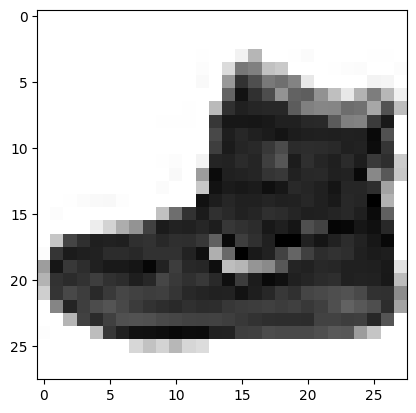

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# We can put between 0 to 59999 here
index = 0

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index], cmap = "gist_yarg")

We'll notice that all of the values in the number are between 0 and 255. If we are training a neural network especially in image processing, for various reasons it will usually learn better if you scale all values to between 0 and 1. It's a process called *normalization* and we can perform it in following manner. 

In [10]:
# Normalize the pixel values of train and test images

training_images = training_images/255.0
test_images = test_images/255.0

LABEL: 9

IMAGE PIXEL ARRAY:
 [[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.

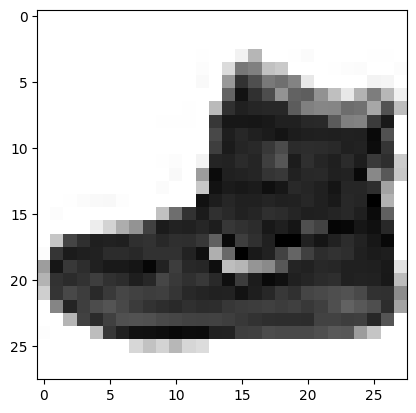

In [11]:
# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index], cmap = "gist_yarg")

#### Let's design our first model

In [12]:
# Build the classification model

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

Here

*   **Sequential** is a class in TensorFlow's Keras API that represents a linear stack of neural network layers. It is a commonly used model type for building deep learning models with a sequential architecture, where each layer is connected to the next one in a sequential manner.
*   **Flatten** is used to convert the 2D 28x28 image data into 1D image data with 784 pixels.
*   **Dense** adds a layer of neurons. Each layer of neurons need *activation function* to tell them what to do and we can specify the *activation function* we want using `activation` parameter as shown above.



As we have defined our model, we need to compile it by using the optimizer and loss function.

For this, <br>
we can use `model.compile` and pass the `optimizer`, `loss` and `metrics` as the argument in the following manner.

In [13]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

Now is the time to fit the training data using `model.fit`

In [14]:
model.fit(training_images, training_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4961 - accuracy: 0.8246
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3736 - accuracy: 0.8653
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3344 - accuracy: 0.8780
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3103 - accuracy: 0.8854
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2938 - accuracy: 0.8934


Let's observe the performance of model in unseen data.

In [16]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3485 - accuracy: 0.8734


[0.34848204255104065, 0.8733999729156494]

#### Let's do some experimentation

In [17]:
image = test_images[0]
label = test_labels[0]

In [18]:
print(label)

9


In [30]:
predicted_label = model.predict(test_images)
print(np.argmax(predicted_label[0]))

313/313 [==============================] - 1s 2ms/step
9


#### Build another model with different number of hidden neurons

In [31]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0


In [32]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


In [33]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4732
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3616
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3237
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3002
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2797


In [34]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.3434


0.34337732195854187

In [36]:
classifications = model.predict(test_images)

print(np.argmax(classifications[0]))
print(test_labels[0])

313/313 [==============================] - 1s 2ms/step
9
9
